# Introdução

Esse é um problema de classificação binária, onde o modelo irá receber os dados da assinatura e retornará um valor que será 1 indicando que o experimento resultou em ativação de algum mecanismo ou 0 para nenhum MOA ativado.

Os dados vêm divididos em dados das expressões genéticas e viabilidade celular contendo o identificador da droga, tempo e doses administradas e os dados com os resultados mostrando quais MOAs foram ativados pelos experimentos.

Para o treinamento do modelo, as duas bases de dados serão fundidas.

# Análise exploratória de dados.

Para iniciar a análise, vamos carregar as bibliotecas.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Em seguida, vamos carregar os dados.

In [3]:
dados = pd.read_csv('https://github.com/rodolfo-luna/imersao-dados-desafio-final/blob/main/Dados/dados_experimentos.zip?raw=true', compression = 'zip')

In [ ]:
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [ ]:
dados.shape

(23814, 877)

Temos 23814 observações no dataset e 877 colunas.

In [ ]:
len(dados.columns[dados.columns.str.startswith('g-')])

772

In [ ]:
len(dados.columns[dados.columns.str.startswith('c-')])

100

In [ ]:
dados['tempo'].unique()

array([24, 72, 48])

In [ ]:
dados['dose'].unique()

array(['D1', 'D2'], dtype=object)

Temos 772 features começando com "g", referente ao dado da expressão dos genes e 100 com "c" referente ao dado da viabilidade celular.

Temos a coluna com o id da amostra, tratamento que informa se na amostra foi utilizado droga ou placebo, tempo e dose que inclui o tempo(24, 48 ou 72 horas) e a dosagem(D1, D2) utilizada no tratamento e a coluna droga que identifica a droga administrada.

### Visualização dos dados

Os gráficos abaixo mostram os comparativos das quantidades de tratamentos, dos tempos e doses utilizados.

Text(0.5, 1.0, 'Comparativo dos tratamentos utilizados\n')

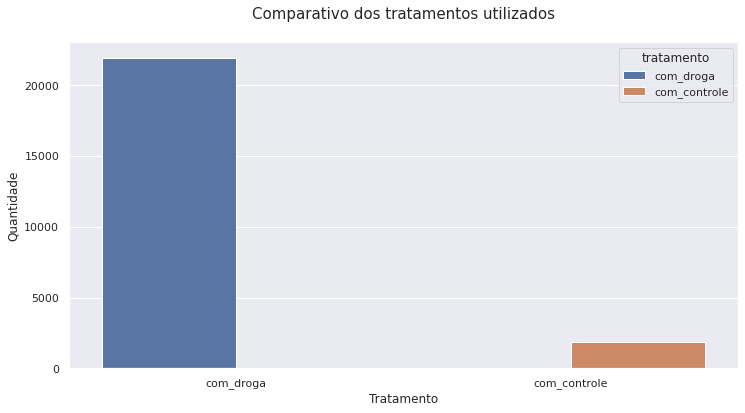

In [ ]:
sns.set_theme(style="whitegrid")
sns.set()
plt.figure(figsize=(12,6))
ax = sns.barplot(x="tratamento", y="quantidade", hue="tratamento",  data=dados['tratamento'].value_counts().rename_axis('tratamento').reset_index(name='quantidade'))
ax.set(xlabel="Tratamento", ylabel = "Quantidade")
plt.title("Comparativo dos tratamentos utilizados\n", size=15)

A maioria dos tratamentos foi feito com droga. Apenas uma pequena parcela foi com placebo.

Text(0.5, 1.0, 'Comparativo das quantidades de doses administradas\n')

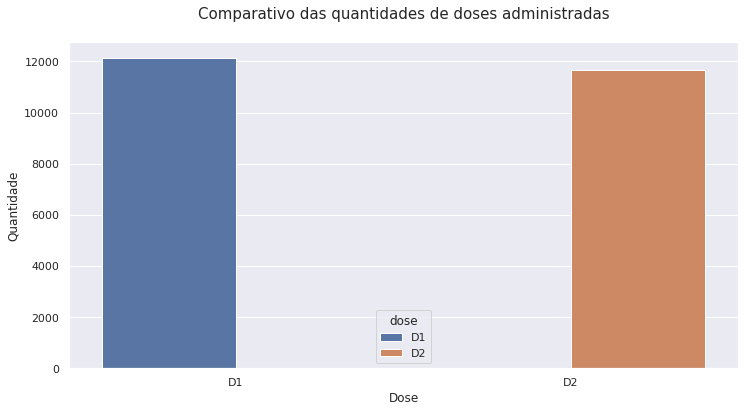

In [ ]:
sns.set_theme(style="whitegrid")
sns.set()
plt.figure(figsize=(12,6))
ax = sns.barplot(x="dose", y="quantidade", hue="dose",  data=dados['dose'].value_counts().rename_axis('dose').reset_index(name='quantidade'))
ax.set(xlabel="Dose", ylabel = "Quantidade")
plt.title("Comparativo das quantidades de doses administradas\n", size=15)

As quantidades de doses D1 e D2 foram bem balanceadas.

Text(0.5, 1.0, 'Comparativo dos tempo utilizados\n')

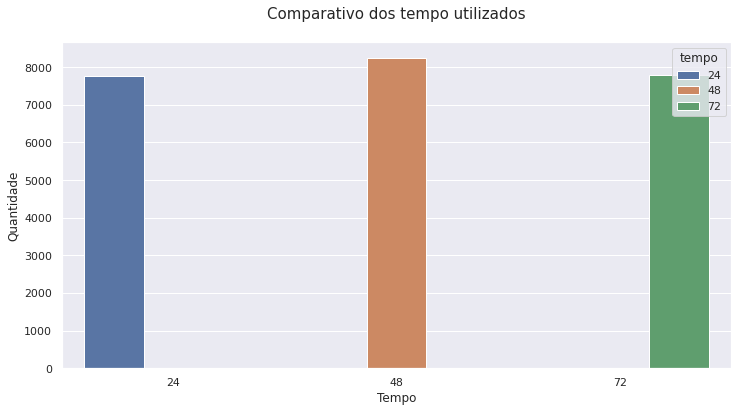

In [ ]:
sns.set_theme(style="whitegrid")
sns.set()
plt.figure(figsize=(12,6))
ax = sns.barplot(x="tempo", y="quantidade", hue="tempo",  data=dados['tempo'].value_counts().rename_axis('tempo').reset_index(name='quantidade'))
ax.set(xlabel="Tempo", ylabel = "Quantidade")
plt.title("Comparativo dos tempo utilizados\n", size=15)

Os tempos de duração administrados nos testes também estão quase que balanceados.

De acordo com a wikipedia, "Ensaios de viabilidade celular  é um teste que analisa células metabolicamente ativas em uma cultura celular, com o objetivo de avaliar sua atividade qualitativa e quantitativamente. Ensaios de viabilidade celular são frequentemente usados para triar moléculas que possuem efeitos na proliferação celular ou efeitos tóxicos que eventualmente podem conduzi-las a morte; muitos desses ensaios são conduzidos em placas de titulação de 96 "poços", de forma que vários compostos possam ser triados ao mesmo tempo." [1]

Na discussão do desafio no Kaggle, o host da competição afirma o seguinte:

Uma medida de viabilidade celular negativa alta reflete uma alta probabilidade de morte.[2]

Vamos analisar os valores em algumas células.

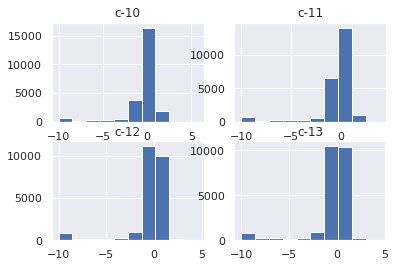

<Figure size 1368x720 with 0 Axes>

In [ ]:
f,a = plt.subplots(2,2)
a = a.ravel()
colunas = ('c-10', 'c-11', 'c-12', 'c-13')
titulos = ['c-10', 'c-11', 'c-12', 'c-13'] 
plt.figure(figsize=(19,10))
for idx,ax in enumerate(a):
    ax.hist(dados[colunas[idx]])
    ax.set_title(titulos[idx])

plt.tight_layout()

Vamos ver a diferença das células no experimento com controle e com droga.

In [ ]:
com_droga = dados.query('tratamento == "com_droga"')
com_controle = dados.query('tratamento == "com_controle"')

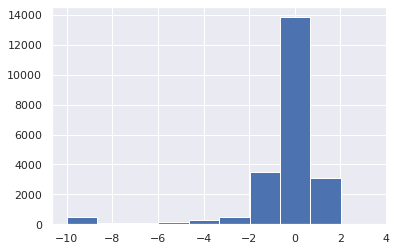

In [ ]:
com_droga['c-0'].hist()

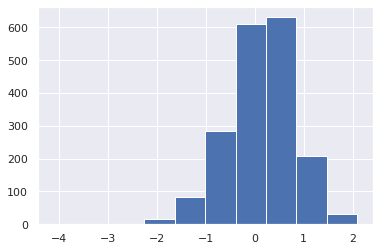

In [ ]:
com_controle['c-0'].hist()

Temos mais valores negativos no tratamento com controle nesse exemplo, mas para tirar conclusões, teríamos que analisar todas as células.

Vamos ver a correlação das células no tratamento com droga.

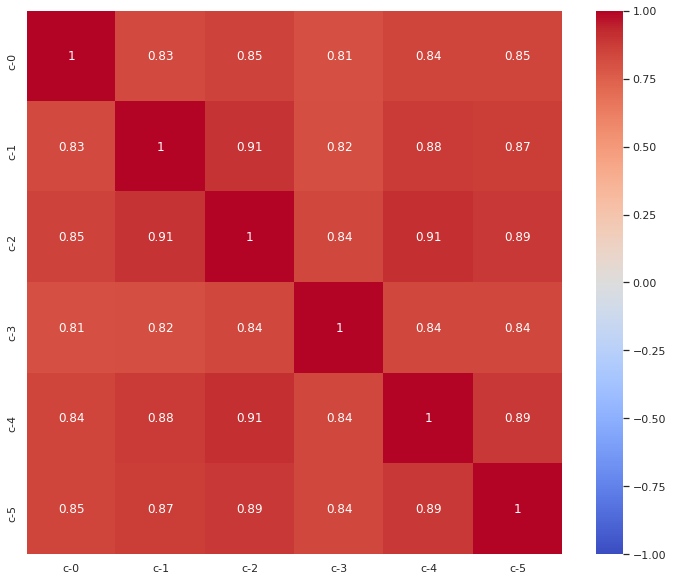

In [ ]:
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(com_droga[['c-0', 'c-1', 'c-2', 'c-3', 'c-4', 'c-5']].corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', ax=ax)

A correlação nessas features estão bem altas.

A feature "g" está relacionada a expressão genética, que "é o processo pelo qual a informação hereditária contida em um gene, tal como a sequência de DNA, é utilizada de modo a formar um produto génico funcional, tal como proteínas ou RNA." [3]

Resumindo, os mecanismos de ações dos alvos desse estudo, ativarão alguns genes e proteínas serão sintetizadas.

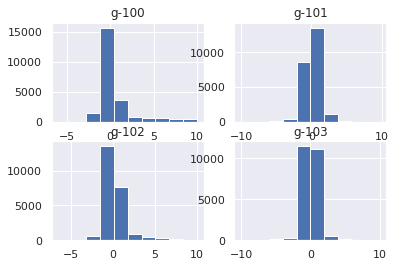

<Figure size 1368x720 with 0 Axes>

In [ ]:
f,a = plt.subplots(2,2)
a = a.ravel()
colunas = ('g-100', 'g-101', 'g-102', 'g-103')
titulos = ['g-100', 'g-101', 'g-102', 'g-103'] 
plt.figure(figsize=(19,10))
for idx,ax in enumerate(a):
    ax.hist(dados[colunas[idx]])
    ax.set_title(titulos[idx])

plt.tight_layout()

Vamos avaliar o impacto do tempo do tratamento da expressão genética.

Text(0.5, 1.0, '(g-110) 24 horas de tratamento\n')

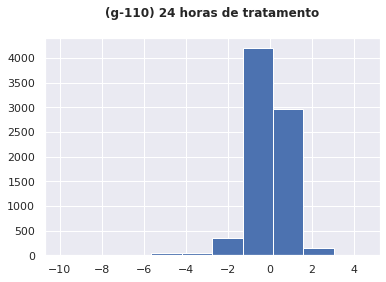

In [ ]:
dados.query('tempo == 24')['g-110'].hist().set_title('(g-110) 24 horas de tratamento\n',fontweight='bold')

Text(0.5, 1.0, '(g-110) 48 horas de tratamento\n')

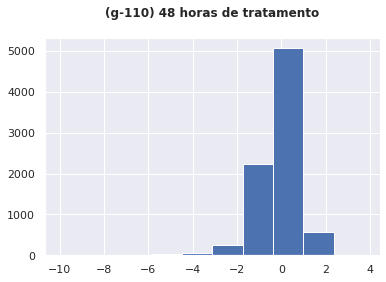

In [ ]:
dados.query('tempo == 48')['g-110'].hist().set_title('(g-110) 48 horas de tratamento\n',fontweight='bold')

Text(0.5, 1.0, '(g-110) 72 horas de tratamento\n')

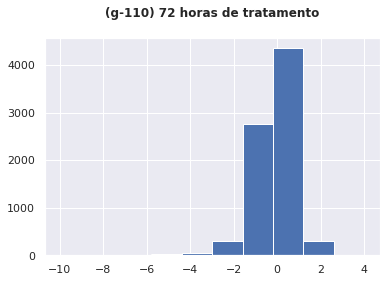

In [ ]:
dados.query('tempo == 72')['g-110'].hist().set_title('(g-110) 72 horas de tratamento\n',fontweight='bold')

Vamos visualizar a correlação de 100 genes aleatórios no tratamento com droga.

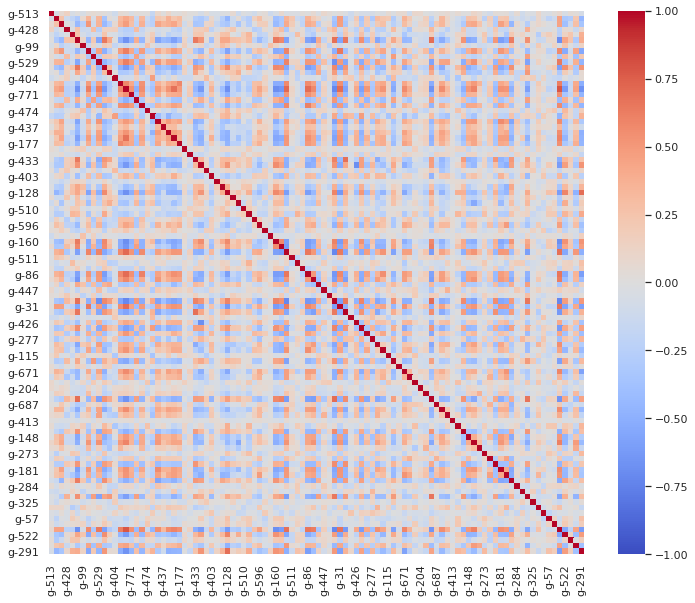

In [ ]:
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(com_droga.loc[:, com_droga.columns.str.startswith('g-')].sample(n=100, axis=1).corr(), annot = False, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', ax=ax)

In [ ]:
corr_matrix = com_droga.loc[:, com_droga.columns.str.startswith('g-')].corr().unstack().sort_values().drop_duplicates()

In [ ]:
corr_matrix.head()

g-349  g-228   -0.828494
g-760  g-248   -0.822524
g-460  g-228   -0.815484
g-744  g-228   -0.815010
g-349  g-63    -0.811955
dtype: float64

In [ ]:
corr_matrix.tail()

g-50   g-489    0.847806
g-489  g-37     0.850502
g-50   g-672    0.851694
       g-37     0.912383
g-0    g-0      1.000000
dtype: float64

Temos correlações positivas e negativas fortes.

## **Análise dos alvos.**

Os alvos aqui são os Mecanismos de ativação (MOAs)

In [5]:
resultados = pd.read_csv('https://github.com/rodolfo-luna/imersao-dados-desafio-final/blob/main/Dados/dados_resultados.csv?raw=true')
resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
resultados.shape

(23814, 207)

Text(0.5, 1.0, 'Maiores números de amostras positivas\n')

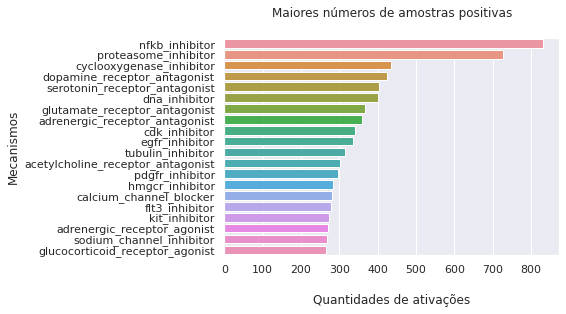

In [ ]:
sns.set()
sns.set_theme(style="darkgrid")

top_targets = resultados.sum().reset_index()[1:]
top_targets = top_targets.rename(columns={top_targets.columns[1]: 'qtds'})

ax = sns.barplot(y='index', x='qtds',data=top_targets.sort_values(by=['qtds'], ascending=False).head(20))
plt.xlabel("\nQuantidades de ativações")
plt.ylabel("Mecanismos")
plt.title("Maiores números de amostras positivas\n")

Temos 23814 observações e 207 colunas, uma coluna com o id da substância e 206 dos mecanismos.

Text(0.5, 1.0, 'Menores números de amostras positivas\n')

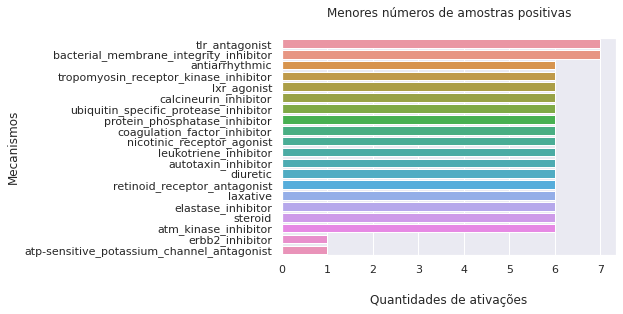

In [ ]:
sns.set()
sns.set_theme(style="darkgrid")

top_targets = resultados.sum().reset_index()[1:]
top_targets = top_targets.rename(columns={top_targets.columns[1]: 'qtds'})

ax = sns.barplot(y='index', x='qtds',data=top_targets.sort_values(by=['qtds'], ascending=False).tail(20))
plt.xlabel("\nQuantidades de ativações")
plt.ylabel("Mecanismos")
plt.title("Menores números de amostras positivas\n")

Temos Moas com excesso de ativações e outros com poucas, deixando o dataset bastante desbalanceado.

Correlação entre os alvos:

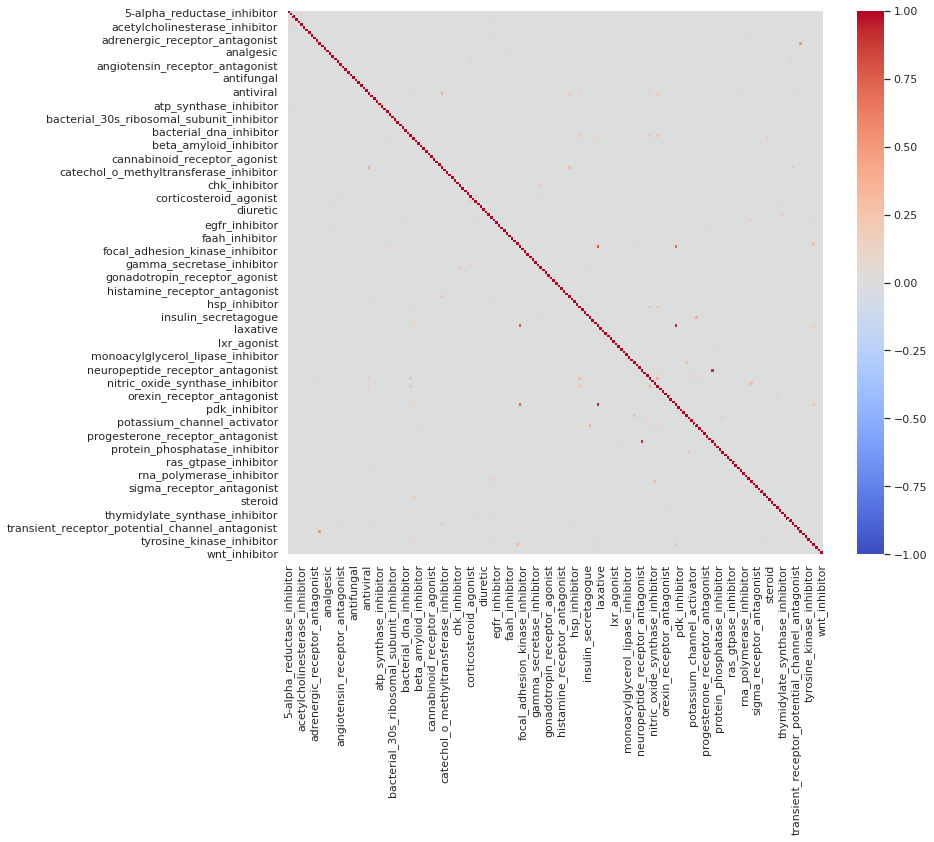

In [ ]:
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(resultados.iloc[:, 1:].corr(), annot = False, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', ax=ax)

A maioria dos alvos tem 0 de correlação, porém algumas correlações são bastante altas, vamos analisá-las melhor.

In [ ]:
corr_matrix_resultados = resultados.iloc[:, 1:].corr().unstack().drop_duplicates().reset_index(name='corr').sort_values(by='corr')
corr_matrix_resultados.tail()

,level_0,level_1,corr
14337,flt3_inhibitor,pdgfr_inhibitor,0.705119
14307,flt3_inhibitor,kit_inhibitor,0.758112
17335,kit_inhibitor,pdgfr_inhibitor,0.915603
18649,nfkb_inhibitor,proteasome_inhibitor,0.921340
0,5-alpha_reductase_inhibitor,5-alpha_reductase_inhibitor,1.000000


Os pares nfkb_inhibitor e proteasome_inhibitor e kit_inhibitor e pdgfr_inhibitor têm correlações maiores que 0,9.

# Preparação dos dados para os modelos.

Vamos começar criando as colunas n_moa, com o número de mecanismos ativados pelas substâncias e ativo_moa que indica se a substância ativou algum mecanismo.

Em seguida juntaremos os dois dataframes.

In [6]:
resultados['n_moa'] = resultados.drop('id', axis=1).sum(axis=1)
resultados['ativo_moa'] = (resultados['n_moa'] != 0)

combinados = pd.merge(dados, resultados[['id','n_moa', 'ativo_moa']], on='id')

In [ ]:
combinados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


As colunas das células estão fortemente correlacionadas, o que causa problemas para os modelos de regressão. Isso pode levar a resultados distorcidos ou enganosos.

Vamos eliminar essas colunas.

In [7]:
combinados_s_cel = combinados.loc[:,~combinados.columns.str.startswith('c-')]
combinados_s_cel.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,g-734,g-735,g-736,g-737,g-738,g-739,g-740,g-741,g-742,g-743,g-744,g-745,g-746,g-747,g-748,g-749,g-750,g-751,g-752,g-753,g-754,g-755,g-756,g-757,g-758,g-759,g-760,g-761,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.6598,-0.4772,0.1289,-0.0297,0.4564,-0.1447,0.4683,-0.1722,0.9998,1.2860,-0.6166,0.0963,1.6340,-0.8744,0.4931,-0.0283,-0.3110,-0.1117,-0.4528,1.3240,-0.0503,-1.2750,-0.1750,-0.6972,-0.2720,0.2931,1.5280,0.3453,-0.5055,-0.3167,1.0930,0.0084,0.8611,-0.5582,0.3008,1.6490,0.2968,-0.0224,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,-0.0961,0.2919,-0.4584,0.0556,0.9844,-0.6653,-0.3092,-0.1507,-0.9481,-0.1966,0.8554,0.5839,-1.6840,0.0648,0.5845,0.0891,-0.5025,-0.1047,0.3764,-1.4800,-0.2947,0.2745,-0.5234,0.1575,-0.1214,0.0476,0.1657,1.0310,-0.5338,0.0224,-0.4831,0.2128,-0.6999,-0.1214,-0.1626,-0.3340,-0.3289,-0.2718,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-1.1110,-0.5649,-0.2617,2.9120,2.7720,0.1523,-1.1230,-0.5340,-0.7937,0.3457,-0.6136,-0.0706,-0.7474,0.1795,-0.4674,-0.1552,0.6338,0.5130,-0.3625,0.0873,0.2689,-0.2174,0.7069,-0.6456,0.6822,0.2237,-0.3601,1.2780,2.5770,0.2356,1.3230,-1.3730,-0.2682,0.8427,0.5797,0.3143,0.8133,0.7923,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-0.2822,-0.8175,1.4930,-0.0711,-1.6250,-0.4317,-0.0239,0.5046,-0.8061,0.9736,1.2540,2.0730,0.6604,-0.4758,-0.1766,-0.8959,0.6560,-0.0875,0.1082,-0.7158,0.0712,-0.1939,0.4286,-1.0220,0.9017,1.1750,-0.5760,0.7801,-0.1292,3.4310,1.2720,-0.4733,-2.0560,0.5699,0.1996,0.4374,0.1588,-0.0343,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1874,-0.0465,1.0560,-0.6324,-0.3651,0.9485,-0.6745,0.0479,-1.0470,-1.2440,-0.7675,0.2327,0.3698,1.4900,0.3632,1.4380,-0.5047,-0.2092,-0.4386,-1.1780,0.8236,1.0540,0.6745,-0.6354,-0.6745,-1.3780,0.7521,-0.9456,-0.6904,2.0540,-0.3131,-0.0809,0.3910,1.7660,-1.0020,-0.7534,0.5000,-0.6269,1,True


Agora vamos dividir a base de treino e teste.

In [8]:
from sklearn.model_selection import train_test_split

x = combinados_s_cel.drop(['id', 'n_moa', 'ativo_moa', 'droga'], axis=1)
x = pd.get_dummies(x, columns=['tratamento', 'dose', 'tempo'])
y = combinados_s_cel['ativo_moa'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

# Machine Learning

Começaremos com a técnica de support vector classifier linear, conforme recomendado no fluxograma do scikit learn.

Vamos testar alguns parâmetros utilizando o GridSearchCV que busca, com os parâmetros selecionados, o melhor estimador.

In [218]:
%%time

from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

parameters = {'loss':('hinge', 'squared_hinge'), 'C':[1, 10]}
modelo_lsvc = LinearSVC()
clf = GridSearchCV(modelo_lsvc, parameters)
clf.fit(x_treino, y_treino)
GridSearchCV(estimator=LinearSVC(), param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})
sorted(clf.cv_results_.keys())

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

CPU times: user 14min 31s, sys: 2.82 s, total: 14min 33s
Wall time: 14min 29s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [227]:
clf.best_score_

0.6867355651653488

Conseguimos apenas 0.68 com os parâmetros selecionados.

Vamos tentar a técnica Support Vector Classifier.

In [ ]:
%%time

from sklearn.svm import SVC

svm = SVC().fit(x_treino, y_treino)
svm.score(x_teste, y_teste)

# Conclusões

Testamos algumas técnicas, mas não conseguimos modelo com acurácia relevante. Em versão futura, tentaremos extrair features, utilizando PCA, para resolver o problema de multicolinearidade causada pelas variáveis preditoras com alta correlação. A técnica de Random Forest poderá ser utilizada também para selecionar variáveis, dessa forma o dataset é dividido em duas partes contendo observações que são similares entre si, mas diferentes da outra parte, tendo como objetivo extrair as importâncias das features. 

Existem mais algoritmos de Machine Learning que podem ser testados, incluindo os não supervisionados como o K-means. 

O gridSerachCV contribue bastante para a automação na troca de parâmetros, mas aumenta o tempo de execução da célula, para testes futuros, podemos deixar a execução por mais tempo ou usar máquinas mais robustas.

### **Referências**:

[1] https://pt.wikipedia.org/wiki/Ensaios_de_viabilidade_celular

[2] https://www.kaggle.com/c/lish-moa/discussion/191487

[3] https://pt.wikipedia.org/wiki/Express%C3%A3o_g%C3%A9nica